In [42]:
# Import libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn libraries for preprocessing and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score

# Define relative paths for file extraction
#C:\Users\Boon Hwee\Desktop\Project2\census+income.zip
#C:\Users\Solo\Desktop\School\NTU course 2\census+income.zip
import zipfile
import os

# Path to the zip file
zip_file_path = r'C:\Users\Boon Hwee\Desktop\Project2\census+income.zip'

#'C:\Users\Boon Hwee\Desktop\Project2\extracted_data'
# Create the directory if it doesn't exist and extract the zip file contents
# If the directory does not exist, it will be created
extract_to_path = r'C:\Users\Boon Hwee\Desktop\Project2\extracted_data'
os.makedirs(extract_to_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

# Verify the contents of the extracted directory
extracted_files = os.listdir(extract_to_path)
print("Extracted files:", extracted_files)


Extracted files: ['adult.data', 'adult.names', 'adult.test', 'Index', 'old.adult.names']


In [43]:
# # Load the dataset with appropriate column names
column_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
 "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
  "hours-per-week", "native-country", "income"]

# Need to define relative paths
#'C:\Users\Solo\Desktop\School\NTU course 2\extracted_data\adult.data
df = pd.read_csv(r'C:\Users\Boon Hwee\Desktop\Project2\extracted_data\adult.data', names=column_names, sep=r'\s*,\s*', engine='python')

df.describe()
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


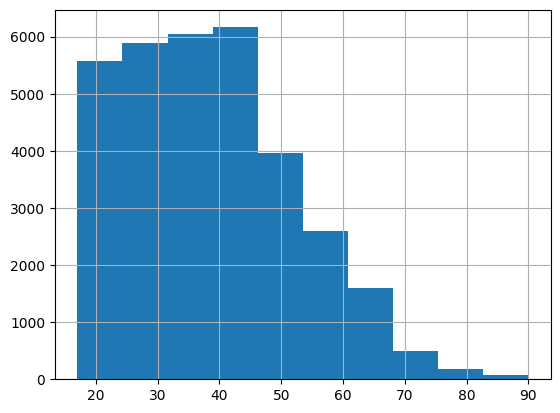

In [44]:
# Handle missing values by replacing '?' with NaN
df.replace('?', np.nan, inplace=True)
df['age'].hist()

# Check for the number of missing values in each column & generate Histogram of Ages Distribution 
missing_values = df.isnull().sum()
print(missing_values)


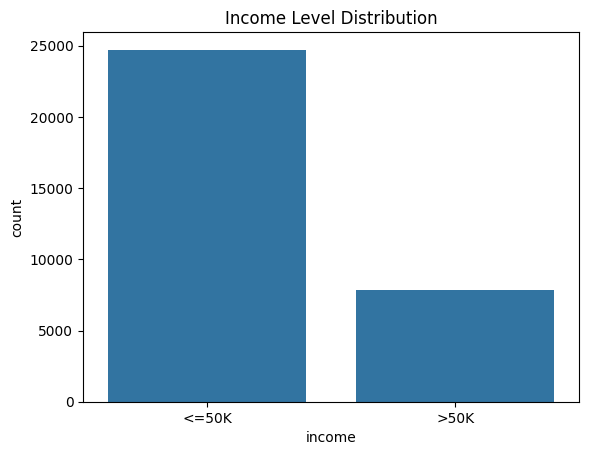

In [45]:
# Generate Bar Chart of Income Level Distribution
sns.countplot(x='income', data=df)
plt.title('Income Level Distribution')
plt.show()


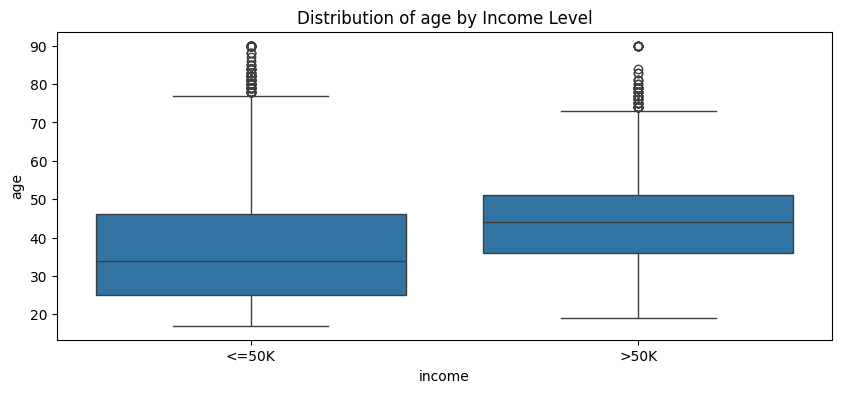

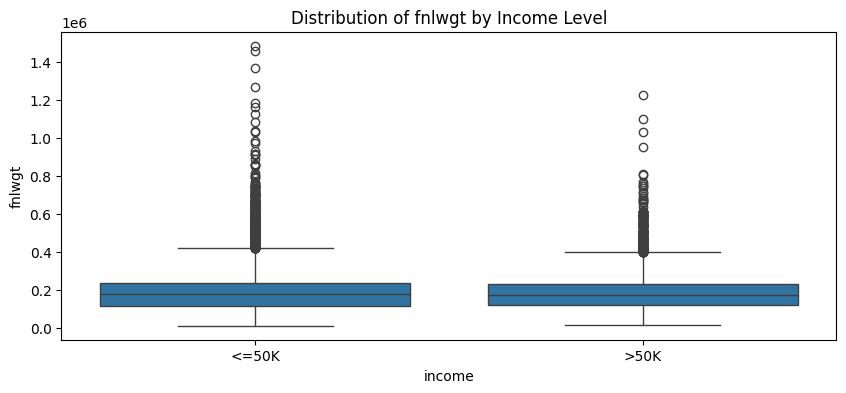

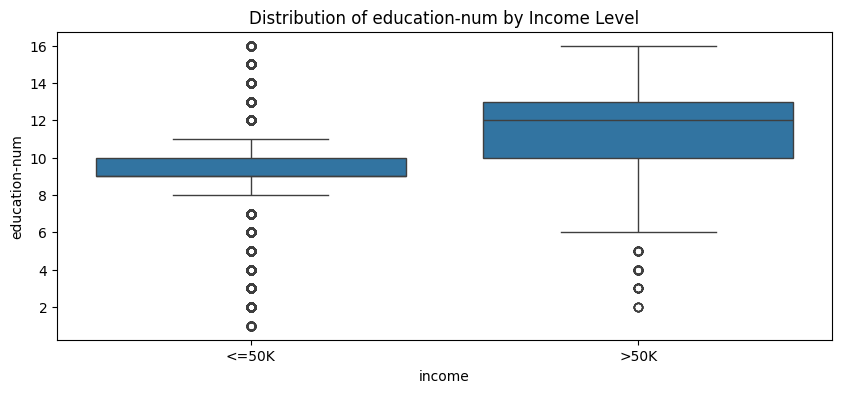

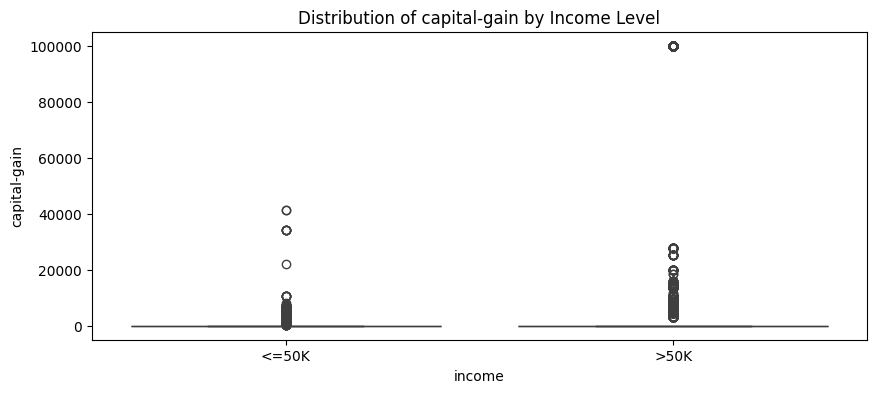

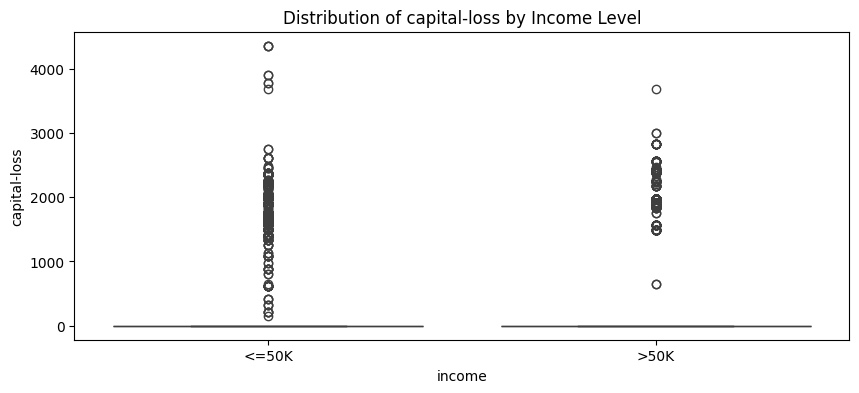

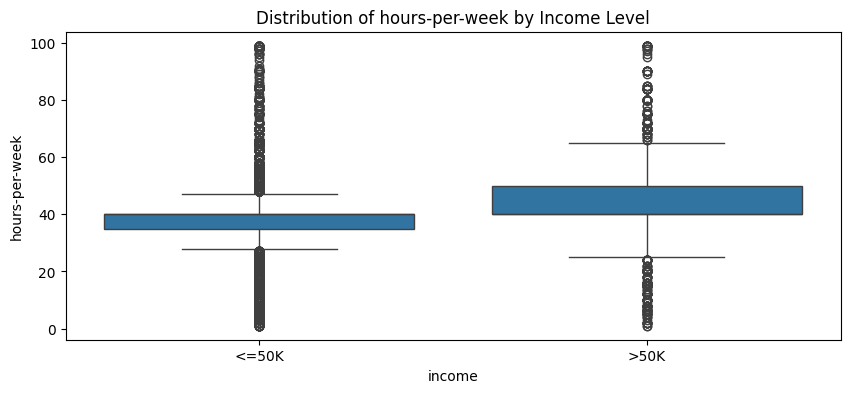

In [46]:
# Generate Box Plot of Age/fnlwgt/education-num/capital-gain/loss by income Level
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='income', y=col, data=df)
    plt.title(f'Distribution of {col} by Income Level')
    plt.show()


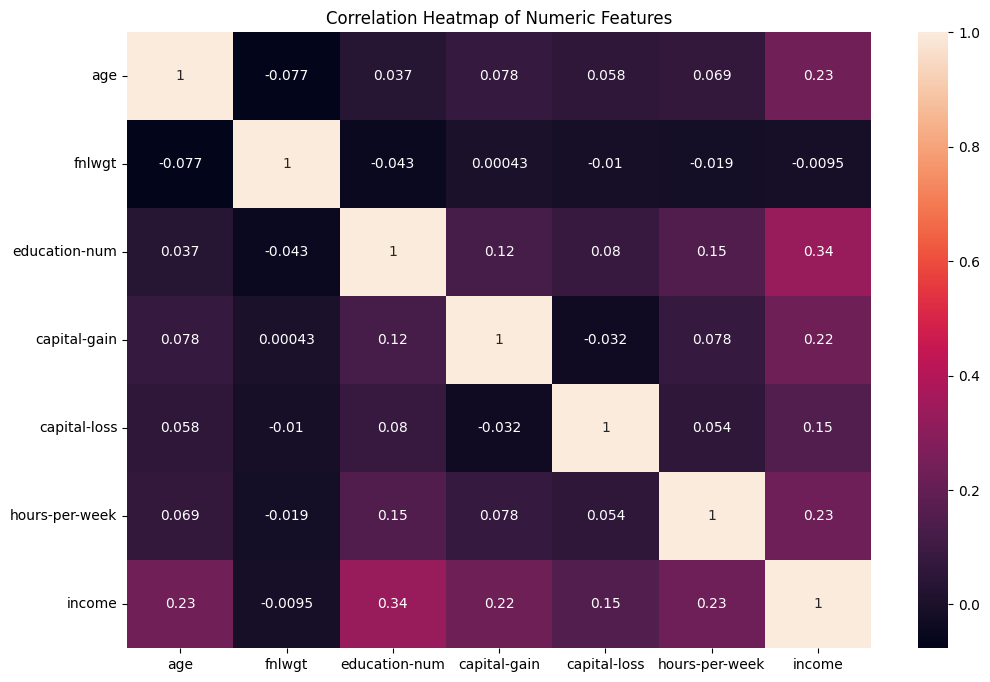

In [47]:
# Create a copy of the dataframe for encoded data
df_encoded = df.copy()

# Apply LabelEncoder to the 'income' column to convert it to numeric
label_encoder = LabelEncoder()
df_encoded['income'] = label_encoder.fit_transform(df['income'])

# Select only numeric columns for the correlation matrix
numeric_cols = df_encoded.select_dtypes(include=[np.number]).columns
correlation_matrix = df_encoded[numeric_cols].corr()

# # Generate Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


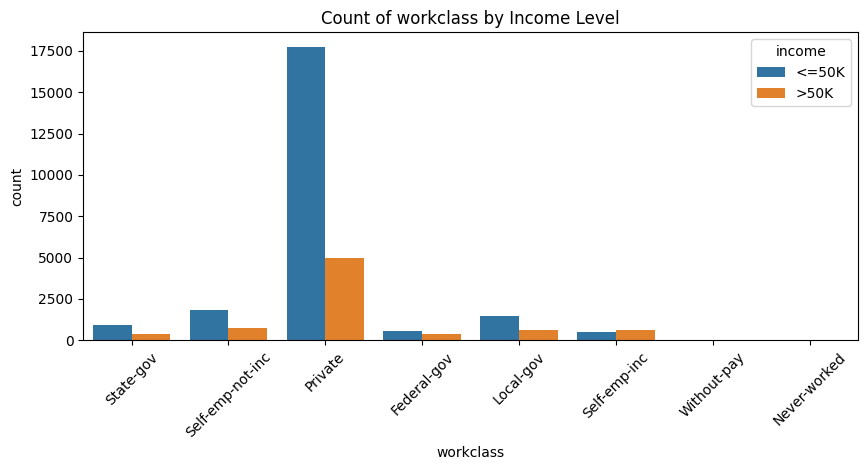

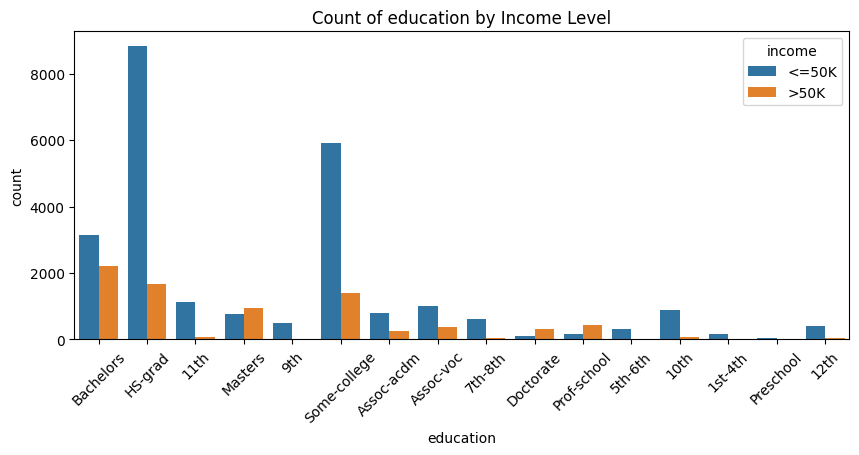

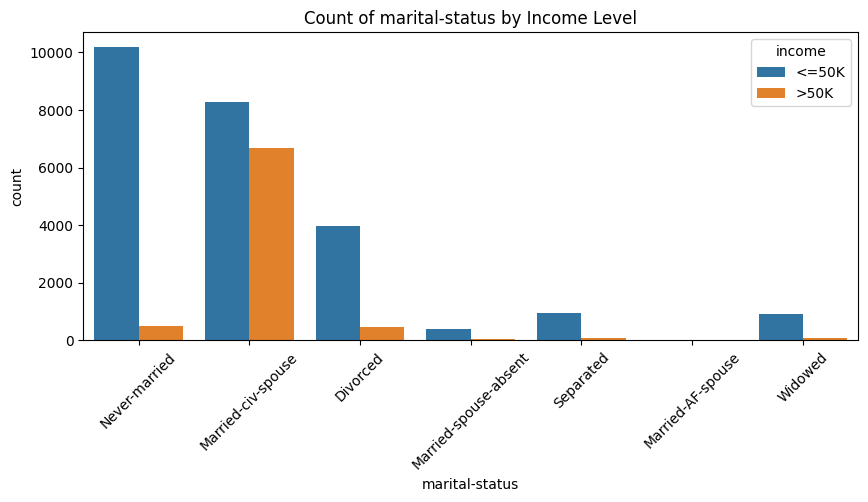

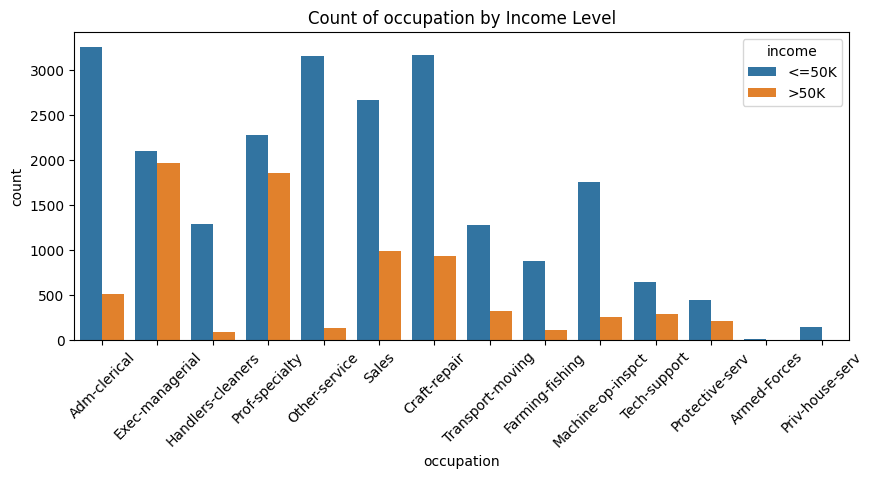

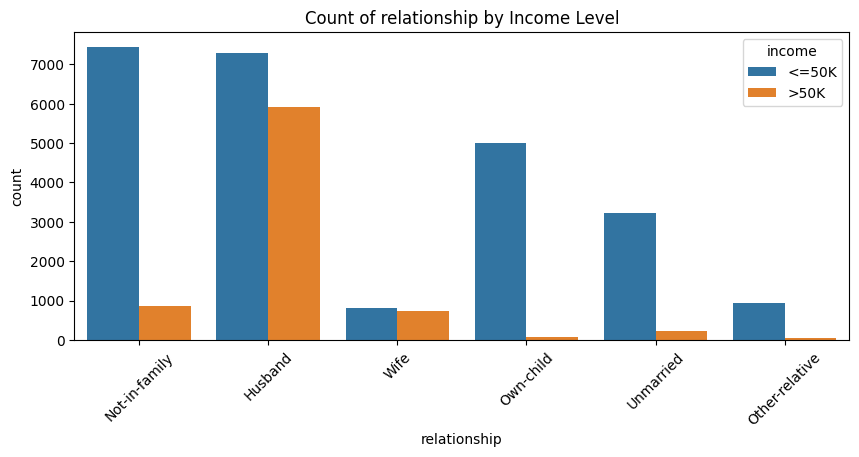

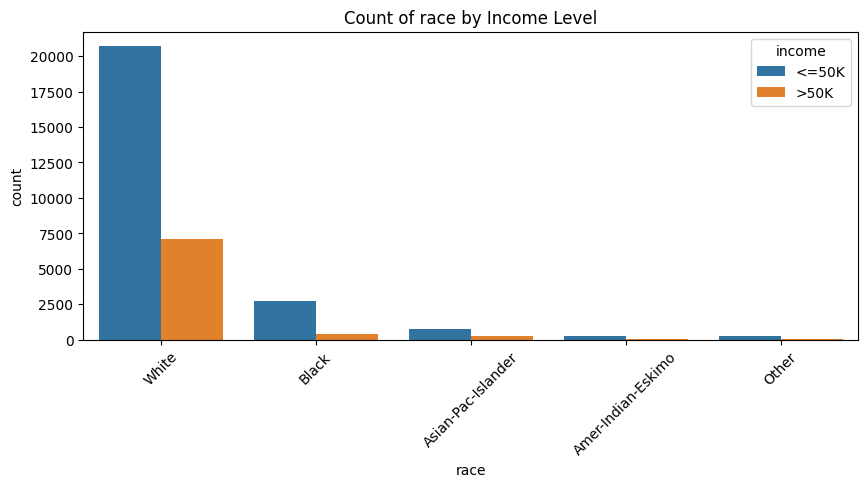

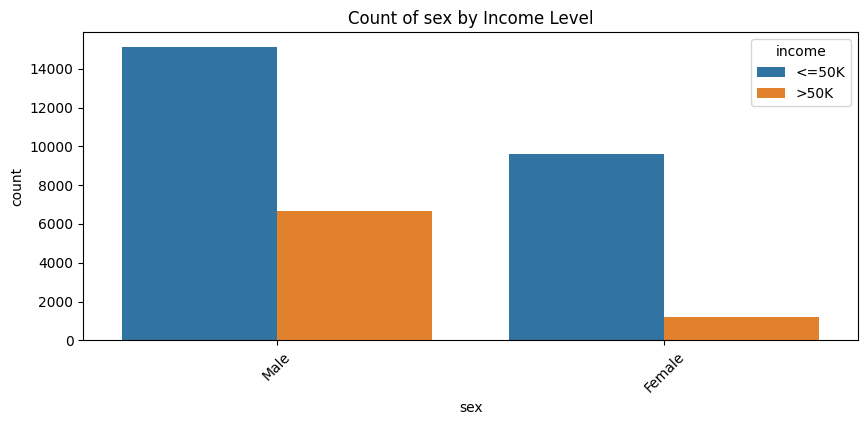

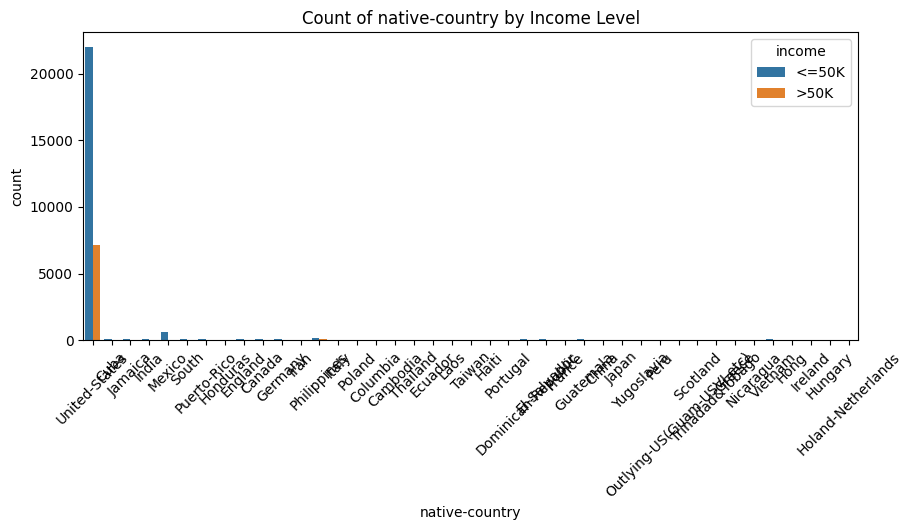

In [48]:
# Generate Bar charts of different key column_names
categorical_cols = df.select_dtypes(include=['object']).columns.drop('income')
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, hue='income', data=df)
    plt.title(f'Count of {col} by Income Level')
    plt.xticks(rotation=45)
    plt.show()
    

In [49]:
# Convert categorical variables into dummy
df = pd.get_dummies(df, drop_first=True)

# Define features (X) and target variable (y)
from sklearn.model_selection import train_test_split
X = df.drop('income_>50K', axis=1)
y = df['income_>50K']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize and train various models

# Initialize and train Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
dt_predictions = decision_tree_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Model Accuracy: {dt_accuracy}")
# Detailed classification report
dt_classification_report = classification_report(y_test, dt_predictions)
print(dt_classification_report)

# Initialize and train Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_predictions = gnb_model.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_predictions)
print(f"Gaussian Naive Bayes Model Accuracy: {gnb_accuracy}")
# Detailed classification report
gnb_classification_report = classification_report(y_test, gnb_predictions)
print(gnb_classification_report)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
# Detailed classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

# Initialize and train Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
# Make predictions
gb_predictions = gb_model.predict(X_test)
# Detailed classification report
print("Gradient Boosting Model Accuracy:", accuracy_score(y_test, gb_predictions))
print(classification_report(y_test, gb_predictions))

# Initialize and train Log model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_test)
# Detailed classification report
print("Logistic Regression Model Accuracy:", accuracy_score(y_test, logreg_predictions))
print(classification_report(y_test, logreg_predictions))


Decision Tree Model Accuracy: 0.8179026562260096
              precision    recall  f1-score   support

       False       0.88      0.88      0.88      4942
        True       0.62      0.63      0.63      1571

    accuracy                           0.82      6513
   macro avg       0.75      0.76      0.75      6513
weighted avg       0.82      0.82      0.82      6513

Gaussian Naive Bayes Model Accuracy: 0.7990173499155535
              precision    recall  f1-score   support

       False       0.81      0.95      0.88      4942
        True       0.68      0.32      0.43      1571

    accuracy                           0.80      6513
   macro avg       0.75      0.64      0.66      6513
weighted avg       0.78      0.80      0.77      6513

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.93      0.91      4942
        True       0.74      0.63      0.68      1571

    accuracy                           0

In [51]:
# Create a dictionary to hold the classification reports for each model
classification_reports = {
    'Decision Tree': classification_report(y_test, dt_predictions, output_dict=True),
    'Gaussian Naive Bayes': classification_report(y_test, gnb_predictions, output_dict=True),
    'Random Forest': classification_report(y_test, rf_predictions, output_dict=True),
    'Gradient Boosting': classification_report(y_test, gb_predictions, output_dict=True),
    'Logistic Regression': classification_report(y_test, logreg_predictions, output_dict=True)
      
}

# Display the results
for model, report in classification_reports.items():
    print(f"Classification Report for {model}:")
    print(report)
    print("\n")
    

Classification Report for Decision Tree:
{'False': {'precision': 0.8827965756216878, 'recall': 0.8763658437879401, 'f1-score': 0.8795694557270513, 'support': 4942.0}, 'True': {'precision': 0.6197884256378344, 'recall': 0.633991088478676, 'f1-score': 0.6268093140339837, 'support': 1571.0}, 'accuracy': 0.8179026562260096, 'macro avg': {'precision': 0.751292500629761, 'recall': 0.7551784661333081, 'f1-score': 0.7531893848805175, 'support': 6513.0}, 'weighted avg': {'precision': 0.8193564092429632, 'recall': 0.8179026562260096, 'f1-score': 0.818601210279514, 'support': 6513.0}}


Classification Report for Gaussian Naive Bayes:
{'False': {'precision': 0.8148725949037962, 'recall': 0.9512343180898422, 'f1-score': 0.8777891886845299, 'support': 4942.0}, 'True': {'precision': 0.6760752688172043, 'recall': 0.32017823042647997, 'f1-score': 0.4345572354211663, 'support': 1571.0}, 'accuracy': 0.7990173499155535, 'macro avg': {'precision': 0.7454739318605001, 'recall': 0.6357062742581611, 'f1-score

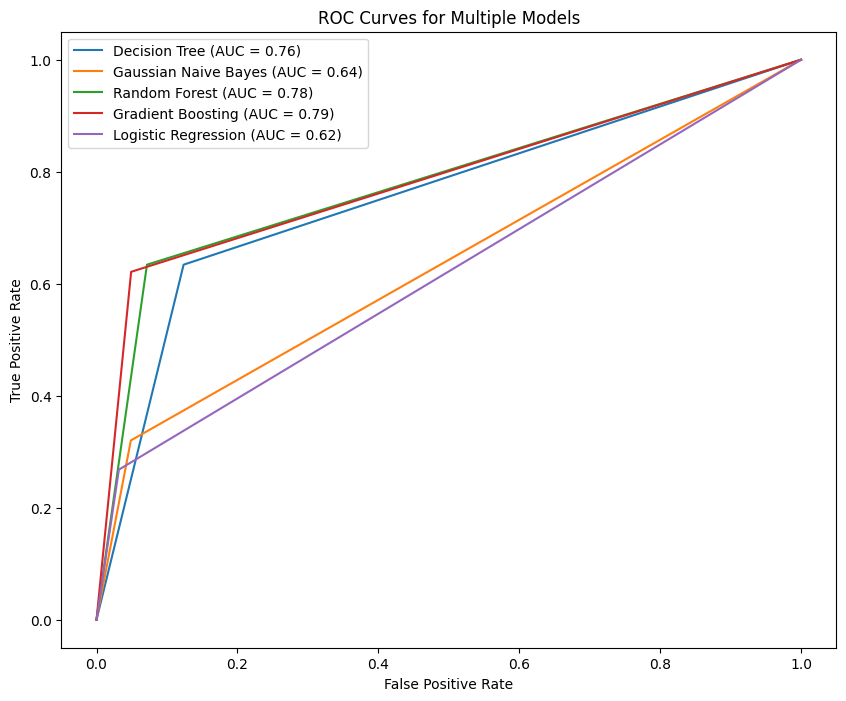

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve
# Plot ROC Curves for multiple models
models = {
    'Decision Tree': dt_predictions,
    'Gaussian Naive Bayes': gnb_predictions,
    'Random Forest': rf_predictions,
    'Gradient Boosting': gb_predictions,
    'Logistic Regression': logreg_predictions
}

plt.figure(figsize=(10, 8))

for name, model in models.items():
    if model.ndim == 1:
        auc = roc_auc_score(y_test, model)
        fpr, tpr, _ = roc_curve(y_test, model)
    else:
        # Calculate ROC curve and AUC for the positive class
        fpr, tpr, _ = roc_curve(y_test, model[:, 1])
        auc = roc_auc_score(y_test, model[:, 1])

    # Plot
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiple Models')
plt.legend(loc='best')
plt.show()


In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Actual training and test data assigned to these variables: X_train, y_train, X_test, y_test

# Define the model with the fixed random state for reproducibility
gb_model = GradientBoostingClassifier(random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
}

# Set up the grid search with cross-validation
grid_cv = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_cv.fit(X_train, y_train)

# Get the best parameters and score from the grid search
best_params = grid_cv.best_params_
best_score = grid_cv.best_score_

print("Best Parameters found: ", best_params)
print("Best Cross-Validation Score: ", best_score)

# Evaluate on the test set with the best found parameters
best_gb_model = grid_cv.best_estimator_
best_gb_predictions = best_gb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, best_gb_predictions)

print("Test Set Accuracy with Best Parameters: ", test_accuracy)
print(classification_report(y_test, best_gb_predictions))


Best Parameters found:  {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score:  0.8686272504144421
Test Set Accuracy with Best Parameters:  0.8744050360816827
              precision    recall  f1-score   support

       False       0.89      0.95      0.92      4942
        True       0.79      0.65      0.71      1571

    accuracy                           0.87      6513
   macro avg       0.84      0.80      0.82      6513
weighted avg       0.87      0.87      0.87      6513



Feature: 0, Score: 0.05814
Feature: 1, Score: 0.00958
Feature: 2, Score: 0.18909
Feature: 3, Score: 0.19608
Feature: 4, Score: 0.05788
Feature: 5, Score: 0.03475
Feature: 6, Score: 0.00148
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00030
Feature: 9, Score: 0.00103
Feature: 10, Score: 0.00568
Feature: 11, Score: 0.00018
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00001
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00027
Feature: 18, Score: 0.00004
Feature: 19, Score: 0.00007
Feature: 20, Score: 0.00011
Feature: 21, Score: 0.00009
Feature: 22, Score: 0.00002
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00023
Feature: 25, Score: 0.00017
Feature: 26, Score: 0.00062
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00064
Feature: 29, Score: 0.37954
Feature: 30, Score: 0.00012
Feature: 31, Score: 0.00052
Feature: 32, Score: 0.00015
Feature: 33, Score: 0.00032
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00028
Fe

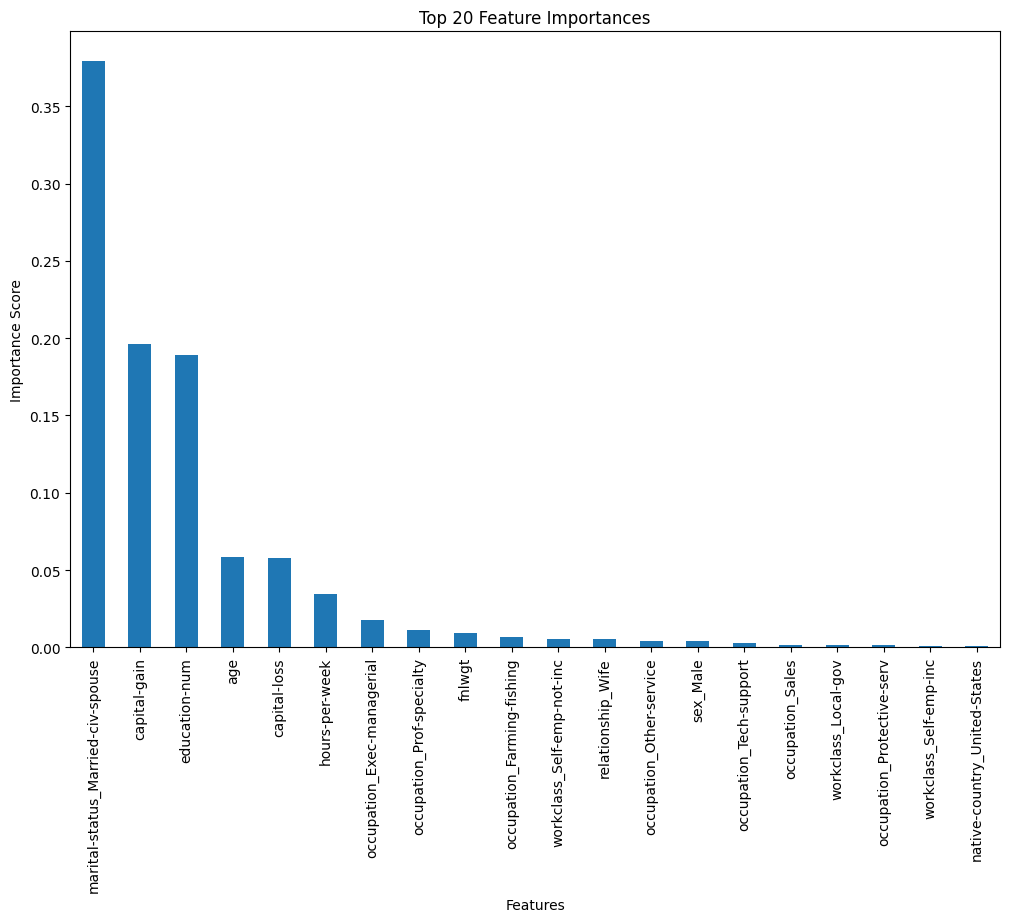

In [54]:
# Get feature importance data
feature_importance = best_gb_model.feature_importances_

# Summarize feature importance
for i, v in enumerate(feature_importance):
    print('Feature: %0d, Score: %.5f' % (i, v))

feature_names = X.columns

# Get feature importance data from the model
feature_importances = best_gb_model.feature_importances_

# Create a pandas Series to map feature names to their importance scores
importance_series = pd.Series(feature_importances, index=feature_names)

# Sort the series to get the most important features
sorted_importances = importance_series.sort_values(ascending=False)

# Print the top 20 features and their importance scores
print("Top 20 most important features:")
print(sorted_importances.head(20))

# Plot the top 20 feature importances for better visualization
plt.figure(figsize=(12,8))
sorted_importances.head(20).plot(kind='bar')
plt.title('Top 20 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


In [55]:
#Cross Validation
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation
cv_scores = cross_val_score(best_gb_model, X, y, cv=10, scoring='accuracy')

# Output the mean and standard deviation of the cross-validation scores
print(f"10-fold Cross-Validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")


10-fold Cross-Validation Accuracy: 0.8681 (+/- 0.0041)


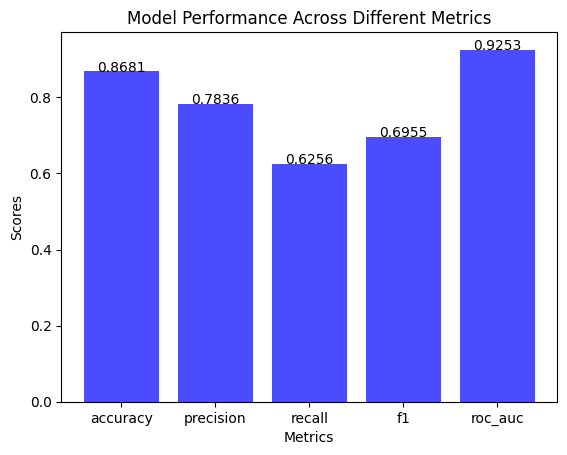

In [56]:
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import numpy as np

# Define the scoring metrics you want to use
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Perform cross-validation using multiple metrics
cv_results = cross_validate(best_gb_model, X, y, cv=10, scoring=scoring_metrics)

# Gather the mean scores for each metric
mean_scores = {metric: cv_results[f'test_{metric}'].mean() for metric in scoring_metrics}

# Set up the bar chart
metrics = list(mean_scores.keys())
scores = list(mean_scores.values())

# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(metrics))

# Draw the bars
plt.bar(x_pos, scores, align='center', alpha=0.7, color='blue')

# Replace the x ticks with the metric names
plt.xticks(x_pos, metrics)

# Add a title and labels
plt.title('Model Performance Across Different Metrics')
plt.xlabel('Metrics')
plt.ylabel('Scores')

# Add the actual value on top of each bar
for i, score in enumerate(scores):
    plt.text(i, score, f"{score:.4f}", ha='center')

# Show the bar chart
plt.show()
